## Telco Customer Churn <br> Sci Learn <br> Support Vector Machine Model 

In [2]:
%matplotlib inline

import os
import sys
import json

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from IPython.display import display
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

# Add our local functions to the path
sys.path.append(os.path.join(os.pardir, 'src'))

# from src
from models import evaluation

# Temporary variables
ALGORITHM_NAME = 'svm'
COUNTRY = 'mwi'


Using TensorFlow backend.


In [3]:
# Change the default directory
os.chdir('/home/mike/Documents/mkp_code/Institute of Data Course/telco-customer-churn-project/data/processed')

In [4]:
# Upload Customer Churn data to dataframe
customer_data = pd.read_csv('Telco-Customer-Churn-Processed.csv')

In [5]:
# Drop Unnamed: 0 - This column is not needed
customer_data.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
# Divide the variables from the target column
target_col = ['Churn']

# Remove the target column
categorical_cols = customer_data.columns
categorical_cols = [col for col in categorical_cols if col not in target_col]

In [7]:
# Variables to a dataframe for processing
X= customer_data[categorical_cols]

In [8]:
# select y = Target Column - Churn
y = customer_data.Churn

In [9]:
# Partition the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [10]:
# Fit the model
model = SVC(probability=True)
%time model.fit(x_train, y_train)

CPU times: user 3.43 s, sys: 102 ms, total: 3.53 s
Wall time: 4.78 s


SVC(probability=True)

In [11]:
# Get an initial score
%time score = model.score(x_train, y_train)
print("In-sample score: {:0.2%}".format(score))

CPU times: user 385 ms, sys: 0 ns, total: 385 ms
Wall time: 749 ms
In-sample score: 80.59%


In [12]:
# Run the model
y_pred = model.predict(x_train)
y_prob = model.predict_proba(x_train)[:,1]

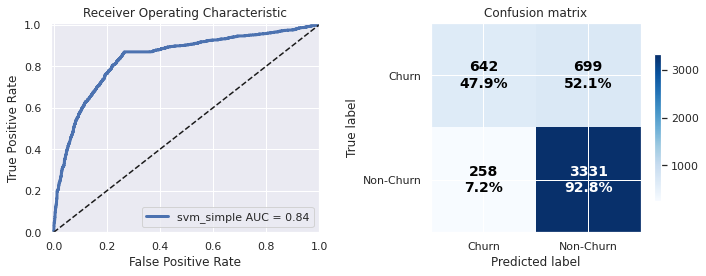

,svm_simple
accuracy,0.805882
recall,0.478747
precision,0.713333
f1,0.572959
cross_entropy,0.443353
roc_auc,0.840338
cohen_kappa,0.453575


In [13]:
# Evaluate performance of train model
metrics = evaluation.evaluate_model(y_train, y_pred, y_prob, 
                                    compare_models=None,
                                    store_model=False,
                                    model_name='simple', 
                                    prefix=ALGORITHM_NAME,
                                    country=COUNTRY,
                                    model=model,
                                    features=x_train.columns.values)

In [14]:
# Fit the model
model = SVC(probability=True)
%time model.fit(x_train, y_train)


CPU times: user 3.51 s, sys: 4.81 ms, total: 3.51 s
Wall time: 6.17 s


SVC(probability=True)

In [15]:
# Get an initial score
%time score = model.score(x_test, y_test)
print("In-sample score: {:0.2%}".format(score))

CPU times: user 163 ms, sys: 0 ns, total: 163 ms
Wall time: 380 ms
In-sample score: 81.02%


In [16]:
# Run the model
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:,1]

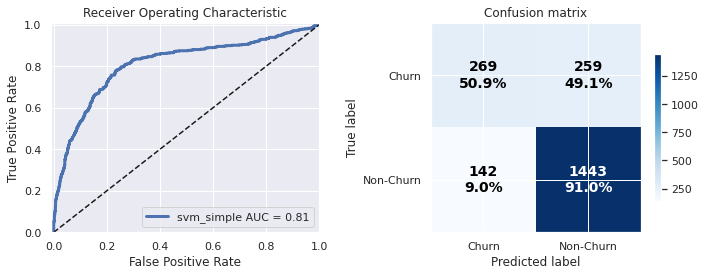

,svm_simple
accuracy,0.810222
recall,0.509470
precision,0.654501
f1,0.572950
cross_entropy,0.437976
roc_auc,0.811163
cohen_kappa,0.453379


In [18]:
# Evaluate performance of train model
metrics = evaluation.evaluate_model(y_test, y_pred, y_prob, 
                                    compare_models=None,
                                    store_model=False,
                                    model_name='simple', 
                                    prefix=ALGORITHM_NAME,
                                    country=COUNTRY,
                                    model=model,
                                    features=x_test.columns.values)